In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load the training data from CSV file

dataset_dir = "../LP-IV-datasets/Object Detection(Ass6)/caltech-101-img" #Specifies the directory path where the dataset is located
dataset_dat4
agen = ImageDataGenerator(
    rescale=1.0 / 255,
)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64), #resizes the image into 64 by 64 pixel
    batch_size=batch_size, #Sets the batch size for training.
    class_mode='categorical' # labels are one-hot encoded
)

Found 9144 images belonging to 102 classes.


In [4]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [5]:
base_model = VGG16(weights = '../LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
                  ,include_top=False,input_shape=(64,64,3))


In [6]:
for layer in base_model.layers:
   layer.trainable = False

In [7]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

# Create the model
# model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=4, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/4
32/32 [==============================] - 103s 3s/step - loss: 3.9521 - accuracy: 0.1895 - val_loss: 3.5418 - val_accuracy: 0.2525
Epoch 2/4
32/32 [==============================] - 48s 1s/step - loss: 3.1072 - accuracy: 0.3370 - val_loss: 3.1548 - val_accuracy: 0.3480
Epoch 3/4
32/32 [==============================] - 43s 1s/step - loss: 2.6496 - accuracy: 0.4385 - val_loss: 2.8798 - val_accuracy: 0.3985
Epoch 4/4
32/32 [==============================] - 44s 1s/step - loss: 2.2737 - accuracy: 0.5035 - val_loss: 2.6318 - val_accuracy: 0.4355


In [9]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)


63/63 [==============================] - 24s 375ms/step


In [10]:
y_classes = [np.argmax(element) for element in predicted_value]
y_classes[:5]

[6, 54, 2, 0, 4]

In [11]:
y_act_cls = [np.argmax(element) for element in x_test]
y_act_cls[:5]

[0, 854, 7452, 30, 0]

Preditcted:  4
Actual:  4


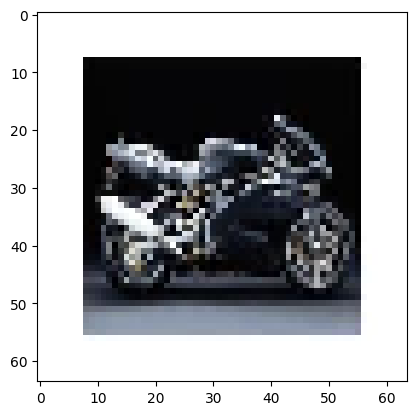

In [12]:
n = 1001
plt.imshow(x_test[n])
print("Preditcted: ",np.argmax(predicted_value[n]))
print("Actual: ", np.argmax(y_test[n]))

In [15]:
base_model = VGG16(weights='../LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(64,64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(102, activation='softmax'))

# Create the model
# model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=4, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/4
32/32 [==============================] - 55s 2s/step - loss: 3.1006 - accuracy: 0.3665 - val_loss: 2.4258 - val_accuracy: 0.4585
Epoch 2/4
32/32 [==============================] - 51s 2s/step - loss: 1.7520 - accuracy: 0.5810 - val_loss: 2.0221 - val_accuracy: 0.5320
Epoch 3/4
32/32 [==============================] - 53s 2s/step - loss: 1.1112 - accuracy: 0.7160 - val_loss: 1.8523 - val_accuracy: 0.5715
Epoch 4/4
32/32 [==============================] - 55s 2s/step - loss: 0.6880 - accuracy: 0.8080 - val_loss: 1.8103 - val_accuracy: 0.5835


Preditcted:  4
Actual:  4


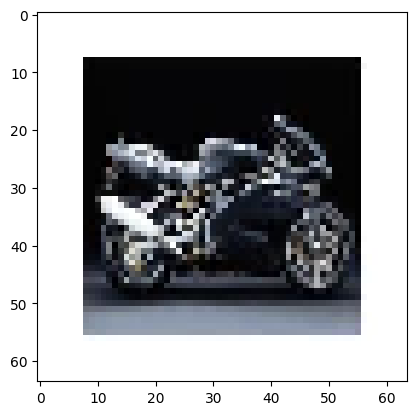

In [17]:
n = 1001
plt.imshow(x_test[n])
print("Preditcted: ",np.argmax(predicted_value[n]))
print("Actual: ", np.argmax(y_test[n]))

In [20]:
y_classes = [np.argmax(element) for element in predicted_value]
y_classes[:10]

[6, 54, 2, 0, 4, 97, 0, 20, 3, 48]

In [21]:
y_act_cls = [np.argmax(element) for element in x_test]
y_act_cls[:10]

[0, 854, 7452, 30, 0, 359, 3770, 4161, 667, 4088]